In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Data preparation Functions

In [ ]:
def load_data(filepath):
    try:
        return pd.read_csv(filepath)
    except FileNotFoundError:
        print("The file was not found. Please check the filepath.")
        return None

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)]) 
        y.append(data[i + sequence_length])      
    return np.array(X), np.array(y)

def prepare_data(filepath, sequence_length):
    data = load_data(filepath)
    if data is not None:
        if 'Price' in data.columns:
            data = data['Price'].values
            X, y = create_sequences(data, sequence_length)
            split = int(0.8 * len(X))
            X_train, X_test = X[:split], X[split:]
            y_train, y_test = y[:split], y[split:]
            return X_train, y_train, X_test, y_test
        else:
            print("Column 'Price' not found in the data.")
            return None, None, None, None
    else:
        return None, None, None, None


In [ ]:
filepath = 'data_preprocessed.csv'
sequence_length = 10
X_train, y_train, X_test, y_test = prepare_data(filepath, sequence_length)

# Ensure data is reshaped correctly for LSTM input
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (388, 10, 1)
y_train shape: (388,)
X_test shape: (97, 10, 1)
y_test shape: (97,)


# Model

In [15]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')


2024-06-26 17:09:18.008176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-26 17:09:18.008639: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-26 17:09:18.009184: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [16]:
# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


2024-06-26 17:09:19.924248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-26 17:09:19.924869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-26 17:09:19.925665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 1/10 [==>...........................] - ETA: 16s - loss: 2.0231

2024-06-26 17:09:21.726983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-26 17:09:21.727499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-26 17:09:21.727994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 2s 43ms/step - loss: 0.9518 - val_loss: 2.3017
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9269 - val_loss: 2.3056
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9329 - val_loss: 2.3066
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.9307 - val_loss: 2.3060
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.9256 - val_loss: 2.3102
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.9232 - val_loss: 2.3081
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.9235 - val_loss: 2.3096
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9181 - val_loss: 2.3132
Epoch 9/50
10/10 [==============================] - 0s 9ms/step - loss: 0.9298 - val_loss: 2.3127
Epoch 10/50
10/10 [==============================] - 0s 9ms/step - loss: 0.9216 - val_loss: 2.3136
Epoch 11/50
10/10 [==========

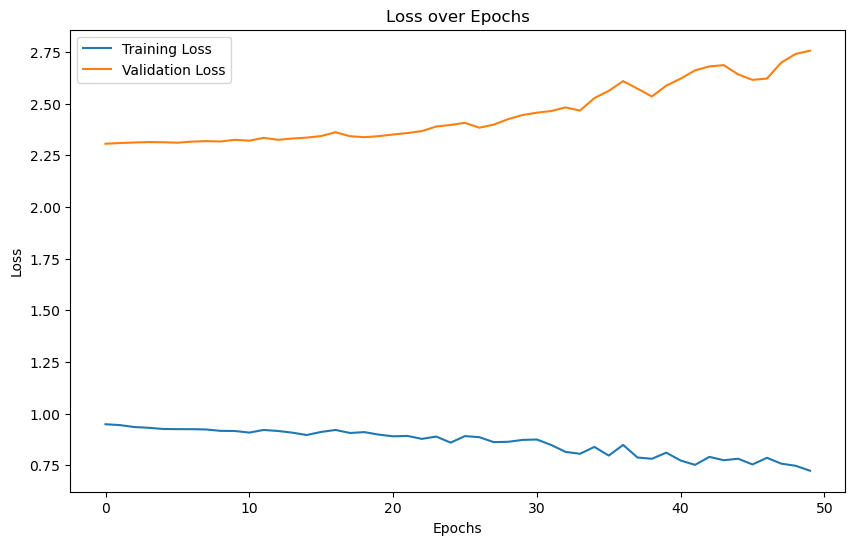

In [8]:
# Plot the losses
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)


2024-06-25 16:10:40.829638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-25 16:10:40.830245: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-25 16:10:40.831086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 0s 2ms/step
Test MSE: 0.18917252805703294


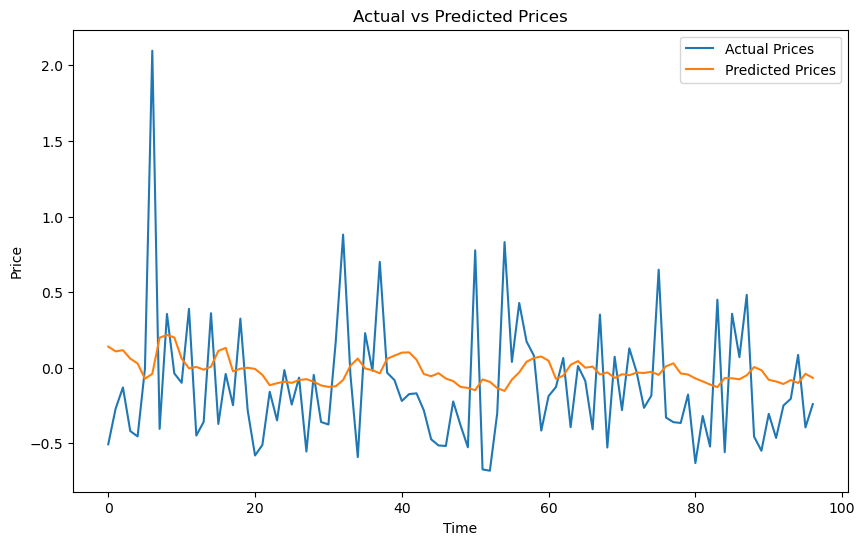

In [9]:
# Evaluate
y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred)**2)
print(f'Test MSE: {mse}')

# Plot the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# Saving and loading the model

In [11]:
model.save('lstm_model.h5')

In [12]:
model = load_model('lstm_model.h5')

2024-06-26 14:58:16.214480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-06-26 14:58:16.215724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-06-26 14:58:16.216432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus